In [1]:
import pandas as pd
import matplotlib.pyplot as plt

logs = # TO FILL
graph_dir = f"{logs}/graphs/accuracy"
processed_log_dir = f"{logs}/resultats_11-23_processed"
log_dir = f"{logs}/resultats_11-23/"
save_dir = f"{processed_log_dir}/resnet/"
path = f"{log_dir}/resnet/"

job_file = save_dir+"/summary.csv"
energy_file = save_dir+"/energy.csv"
jobs = pd.read_csv(job_file).drop(columns=["Unnamed: 0"])

In [2]:
jobs.columns

Index(['job', 'energy_kWh', 'energy_joule',
       'energy_consumption_since_previous_measurement_milliJ', 'job_id',
       'file', 'start_time_ms', 'sub_seed', 'sub_batch-size', 'sub_num-sample',
       'training_start_time_ms', 'train_end_time_ms', 'end_time_ms',
       'epoch_nb', 'block_nb', 'eval_nb', 'mllog_submission_benchmark',
       'mllog_submission_org', 'mllog_submission_division',
       'mllog_submission_status', 'mllog_submission_platform', 'mllog_seed',
       'mllog_model_bn_span', 'mllog_sgd_opt_learning_rate_decay_poly_power',
       'mllog_sgd_opt_end_learning_rate',
       'mllog_lars_opt_learning_rate_decay_poly_power',
       'mllog_lars_opt_end_learning_rate', 'mllog_d_batch_size',
       'mllog_s_optimizer', 'mllog_s_network', 'mllog_s_process',
       'mllog_global_batch_size', 'mllog_gradient_accumulation_steps',
       'mllog_opt_name', 'mllog_lars_epsilon', 'mllog_lars_opt_weight_decay',
       'mllog_lars_opt_momentum', 'mllog_lars_opt_base_learning_rate'

In [5]:
cols = ['mllog_eval_accuracy','energy_kWh','node_nb',  'mllog_gradient_accumulation_steps','block_nb', 
        'mllog_train_samples', 
        'eval_nb',
        'mllog_global_batch_size',
        'mllog_opt_base_learning_rate',
       'mllog_eval_samples', 
        ]
cols = [x for x in jobs.columns if jobs[x].dtype != "object"]
pd.set_option('display.max_colwidth', 15)
pd.set_option('display.max_rows', 67)
jobs[cols].style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)


/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/pandas/io/formats/style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/pandas/io/formats/style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,job,energy_kWh,energy_joule,energy_consumption_since_previous_measurement_milliJ,job_id,start_time_ms,sub_seed,sub_batch-size,sub_num-sample,training_start_time_ms,train_end_time_ms,end_time_ms,epoch_nb,block_nb,eval_nb,mllog_seed,mllog_model_bn_span,mllog_sgd_opt_learning_rate_decay_poly_power,mllog_sgd_opt_end_learning_rate,mllog_lars_opt_learning_rate_decay_poly_power,mllog_lars_opt_end_learning_rate,mllog_d_batch_size,mllog_global_batch_size,mllog_gradient_accumulation_steps,mllog_lars_epsilon,mllog_lars_opt_weight_decay,mllog_lars_opt_momentum,mllog_lars_opt_base_learning_rate,mllog_lars_opt_learning_rate_warmup_epochs,mllog_lars_opt_learning_rate_decay_steps,mllog_train_samples,mllog_eval_samples,mllog_throughput,mllog_eval_accuracy,srun_start_time_ms,node_nb
0,126534,4.666767,16800359.999259,16800359999.258669,126534,1699373764000.000000,51,nan,nan,1699373764000.000000,1699385444000.000000,1699385447000.000000,35,9,9,51,408,2,0.000100,2,0.000100,408,3264,1,0,0.000050,0.900000,10.500000,2,37,1281167,50000,3865.350111,0.761580,1699373763000.000000,1
1,126536,4.677218,16837985.206559,16837985206.559326,126536,1699410081000.000000,51,nan,nan,1699410081000.000000,1699421781000.000000,1699421784000.000000,35,9,9,51,408,2,0.000100,2,0.000100,408,3264,1,0,0.000050,0.900000,10.500000,2,37,1281167,50000,3854.480313,0.761580,1699410081000.000000,1
2,126537,4.689028,16880501.284637,16880501284.637329,126537,1699421849000.000000,6,nan,nan,1699421849000.000000,1699433591000.000000,1699433594000.000000,35,9,9,6,408,2,0.000100,2,0.000100,408,3264,1,0,0.000050,0.900000,10.500000,2,37,1281167,50000,3830.686620,0.760760,1699421847000.000000,1
3,126538,4.729759,17027132.293023,17027132293.022949,126538,1699433656000.000000,42,nan,nan,1699433656000.000000,1699445532000.000000,1699445535000.000000,35,9,9,42,408,2,0.000100,2,0.000100,408,3264,1,0,0.000050,0.900000,10.500000,2,37,1281167,50000,3847.892499,0.760420,1699433655000.000000,1
4,126990,3.718592,13386931.087745,13386931087.744629,126990,1699629132000.000000,51,408.000000,nan,1699629132000.000000,1699630879000.000000,1699630882000.000000,35,9,9,51,408,2,0.000100,2,0.000100,408,3264,1,0,0.000050,0.900000,10.500000,2,37,1281167,50000,27138.595092,0.761580,nan,1
5,127007,1.644348,5919654.229043,5919654229.042969,127007,1699633923000.000000,51,408.000000,nan,1699633923000.000000,1699635708000.000000,1699635711000.000000,35,9,9,51,408,2,0.000100,2,0.000100,408,3264,1,0,0.000050,0.900000,10.500000,2,37,1281167,50000,27181.905682,0.761580,nan,1
6,127008,1.638404,5898253.032166,5898253032.165771,127008,1699635920000.000000,6,408.000000,nan,1699635920000.000000,1699637680000.000000,1699637683000.000000,35,9,9,6,408,2,0.000100,2,0.000100,408,3264,1,0,0.000050,0.900000,10.500000,2,37,1281167,50000,27083.197535,0.760760,nan,1
7,127009,1.637417,5894700.504584,5894700504.584106,127009,1699637900000.000000,42,408.000000,nan,1699637900000.000000,1699639653000.000000,1699639656000.000000,35,9,9,42,408,2,0.000100,2,0.000100,408,3264,1,0,0.000050,0.900000,10.500000,2,37,1281167,50000,27116.938077,0.760420,nan,1
8,127010,1.641889,5910801.661223,5910801661.222534,127010,1699639874000.000000,7,408.000000,nan,1699639874000.000000,1699641641000.000000,1699641644000.000000,35,9,9,7,408,2,0.000100,2,0.000100,408,3264,1,0,0.000050,0.900000,10.500000,2,37,1281167,50000,27158.283156,0.759060,nan,1
9,127011,1.635706,5888539.886912,5888539886.912354,127011,1699641851000.000000,51,408.000000,nan,1699641851000.000000,1699643605000.000000,1699643608000.000000,35,9,9,51,408,2,0.000100,2,0.000100,408,3264,1,0,0.000050,0.900000,10.500000,2,37,1281167,50000,27129.644497,0.761580,nan,1


# Impact of using lvol instead of cstor

In [11]:
res = pd.DataFrame()

In [14]:
# Impact of using cstor instead of lvol
jobs["duration(minutes)"] = (jobs["end_time_ms"] - jobs["start_time_ms"])/60/1000
res["lvol"] = jobs[~jobs["job"].isin([126534, 126536, 126537, 126538, 126990])][["energy_kWh", "mllog_throughput", "duration(minutes)"]].mean()
res["cstor"] = jobs[jobs["job"].isin([126534, 126536, 126537, 126538])][["energy_kWh", "mllog_throughput", "duration(minutes)"]].mean()

In [22]:
res

,lvol,cstor
energy_kWh,1.639150,4.690693
mllog_throughput,27129.851375,3849.602386
duration(minutes),29.419444,195.875000


In [21]:
res["cstor"]/res["lvol"]

energy_kWh           2.861662
mllog_throughput     0.141895
duration(minutes)    6.658012
dtype: float64

# Lvol energy study

In [17]:
jobs = jobs[jobs["job_id"]>126990]

In [18]:
jobs["duration(minutes)"] = (jobs["end_time_ms"] - jobs["start_time_ms"])/60/1000

In [19]:
# preprocessing
jobs["total_batch_size"]=jobs["mllog_d_batch_size"]*jobs["node_nb"]*8
jobs["samples_processed"] = jobs["epoch_nb"]*jobs["total_batch_size"]

In [20]:
# processing
# jobs["sub_num-sample"] = jobs["sub_num-sample"].fillna(100000000)
# jobs["sub_target-accuracy"] = jobs["sub_target-accuracy"].fillna(0.75).astype(float)


In [21]:
cols=['cmd_learning_rate', 'cmd_max_steps']
gp_by = ["node_nb", "sub_seed"] # mllog_train_samples mllog_d_batch_size sub_batch-size sub_num-sample
jobs.groupby(gp_by).count()["job_id"]

node_nb  sub_seed
1        6           6
         7           6
         42          6
         51          6
Name: job_id, dtype: int64

In [22]:
(jobs["energy_kWh"].max()-jobs["energy_kWh"].min())/jobs["energy_kWh"].max()
# diff de 1% entre le max et le min

0.01043014173308666

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

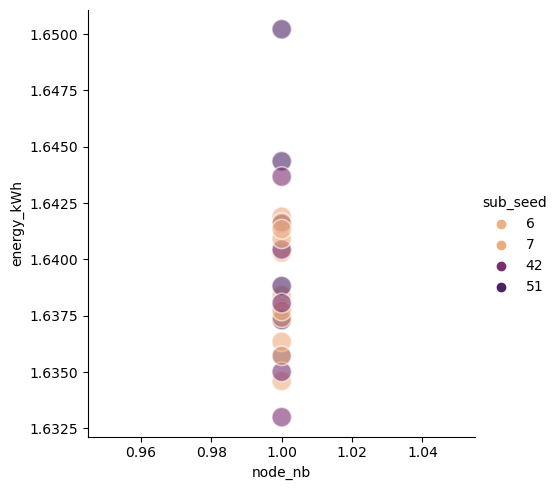

In [23]:
# mllog_train_samples mllog_d_batch_size sub_batch-size sub_num-sample
import seaborn as sns
plt.figure(figsize=(15,8))
sns.relplot(
    data=jobs,
    x="node_nb", y="energy_kWh", hue="sub_seed", s=200, alpha=0.6, palette="flare"
)

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

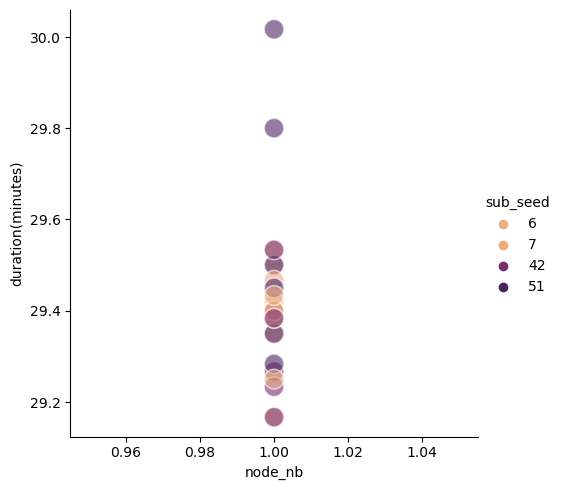

In [24]:
# mllog_train_samples mllog_d_batch_size sub_batch-size sub_num-sample
import seaborn as sns
plt.figure(figsize=(15,8))
sns.relplot(
    data=jobs,
    x="node_nb", y="duration(minutes)", hue="sub_seed", s=200, alpha=0.6, palette="flare"
)

/var/folders/yq/7v824pz907x0d1tjqclbqmn80000gn/T/ipykernel_84046/2739424440.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

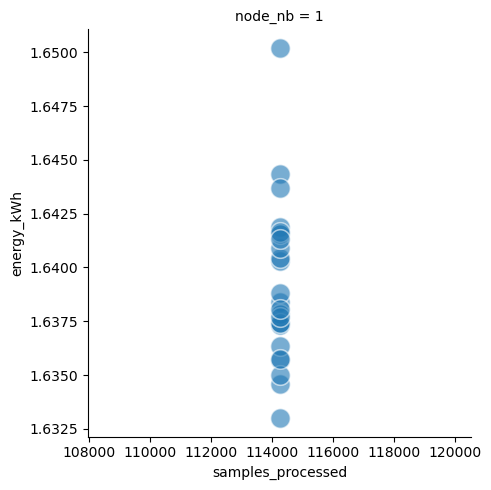

In [26]:
plt.figure(figsize=(15,8))
sns.relplot(
    data=jobs,
    x="samples_processed", y="energy_kWh", col="node_nb", s=200, alpha=0.6, palette="flare"
)

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

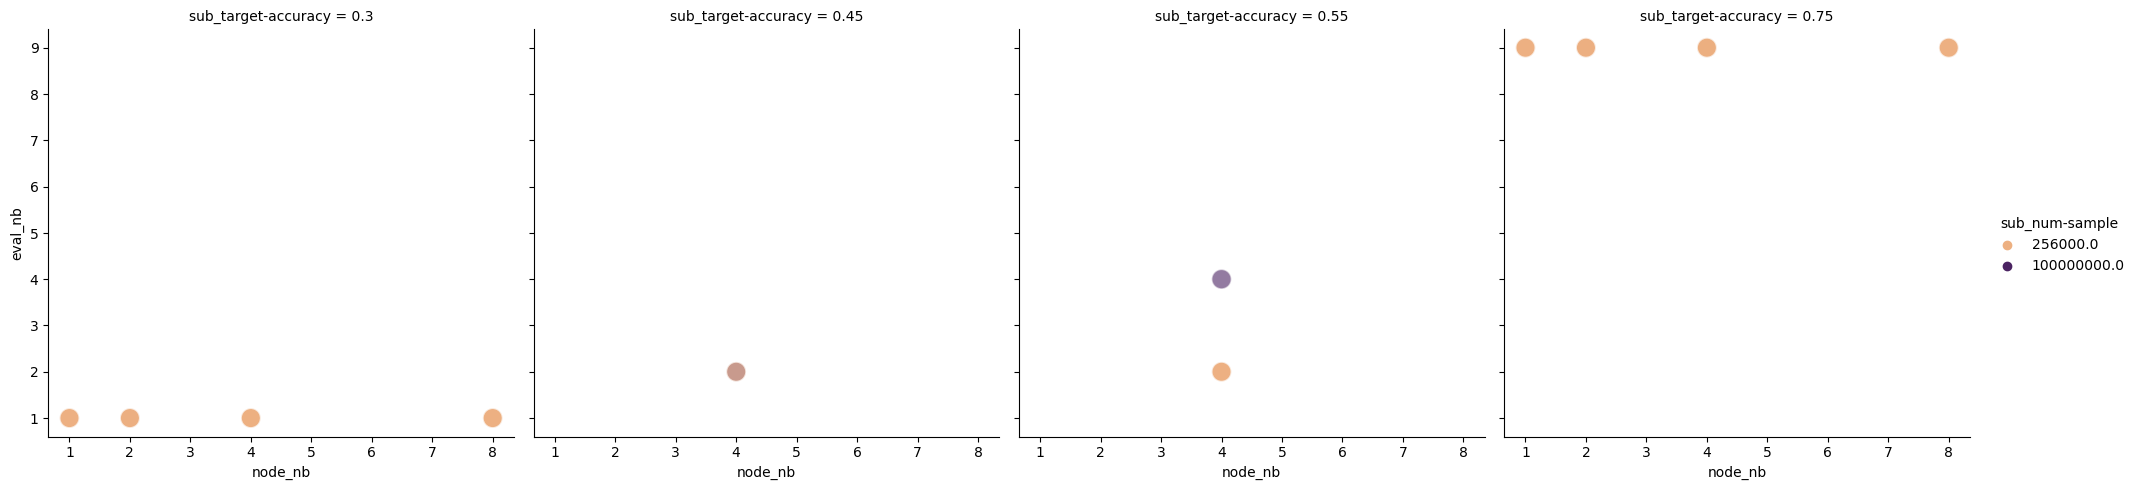

In [ ]:

plt.figure(figsize=(15,8))
sns.relplot(
    data=jobs,
    x="node_nb", y="eval_nb", col="sub_target-accuracy", hue="sub_num-sample", s=200, alpha=0.6, palette="flare"
)

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

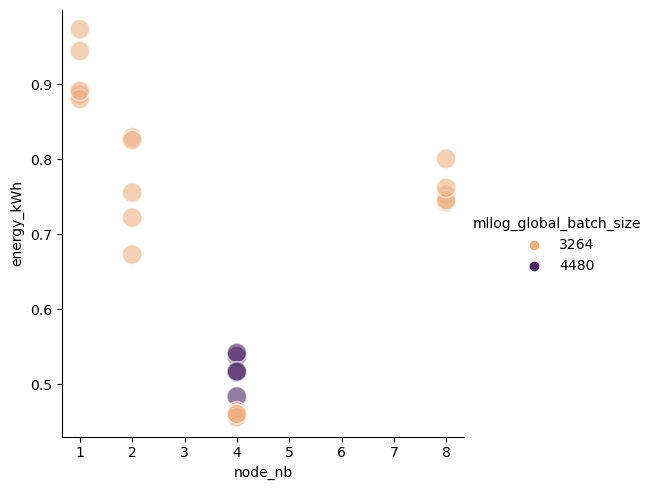

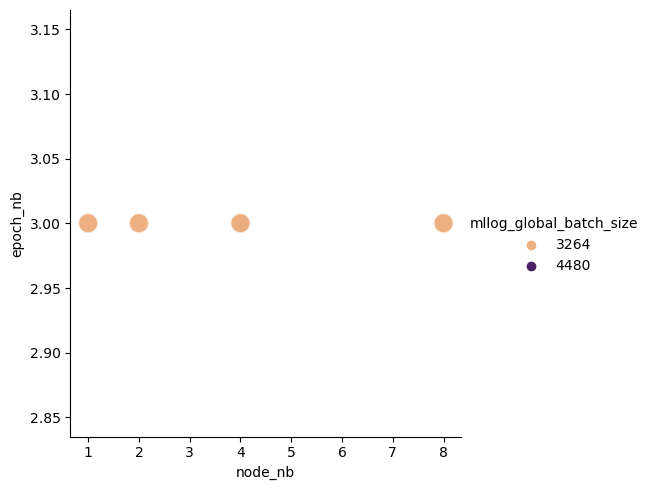

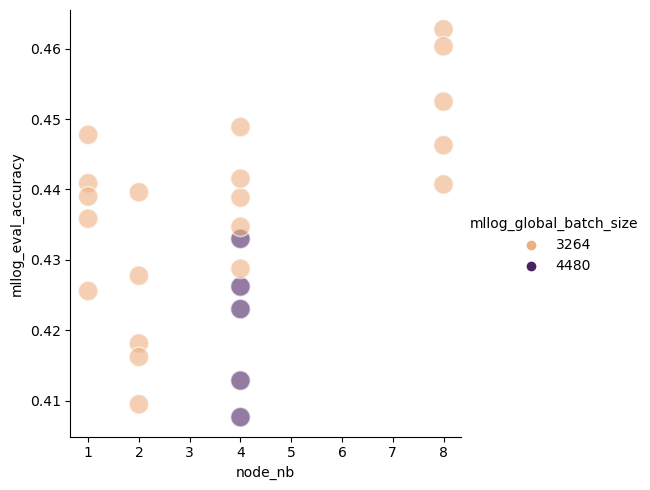

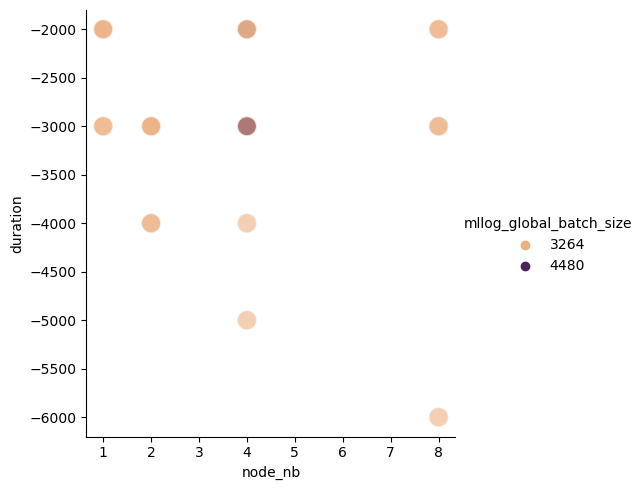

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
plot_df =jobs[(jobs["sub_num-sample"]==256000)&(jobs["sub_target-accuracy"]==0.3)&(jobs["epoch_nb"]>1)][-25:]
sns.relplot(
    data=plot_df,
    x="node_nb", y="energy_kWh", hue="mllog_global_batch_size", s=200, alpha=0.6, palette="flare"
)
sns.relplot(
    data=plot_df,
    x="node_nb", y="epoch_nb", hue="mllog_global_batch_size", s=200, alpha=0.6, palette="flare"
)
sns.relplot(
    data=plot_df,
    x="node_nb", y="mllog_eval_accuracy", hue="mllog_global_batch_size", s=200, alpha=0.6, palette="flare"
)
sns.relplot(
    data=plot_df,
    x="node_nb", y="duration", hue="mllog_global_batch_size", s=200, alpha=0.6, palette="flare"
)

il semblerait que l'énergie consommée diminue avec le max_samples : est ce que ça veut dire qu'il faut plus d'époch ?

TODO : calcul nombre d'epoch + afficher l'évolution de la puissance

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

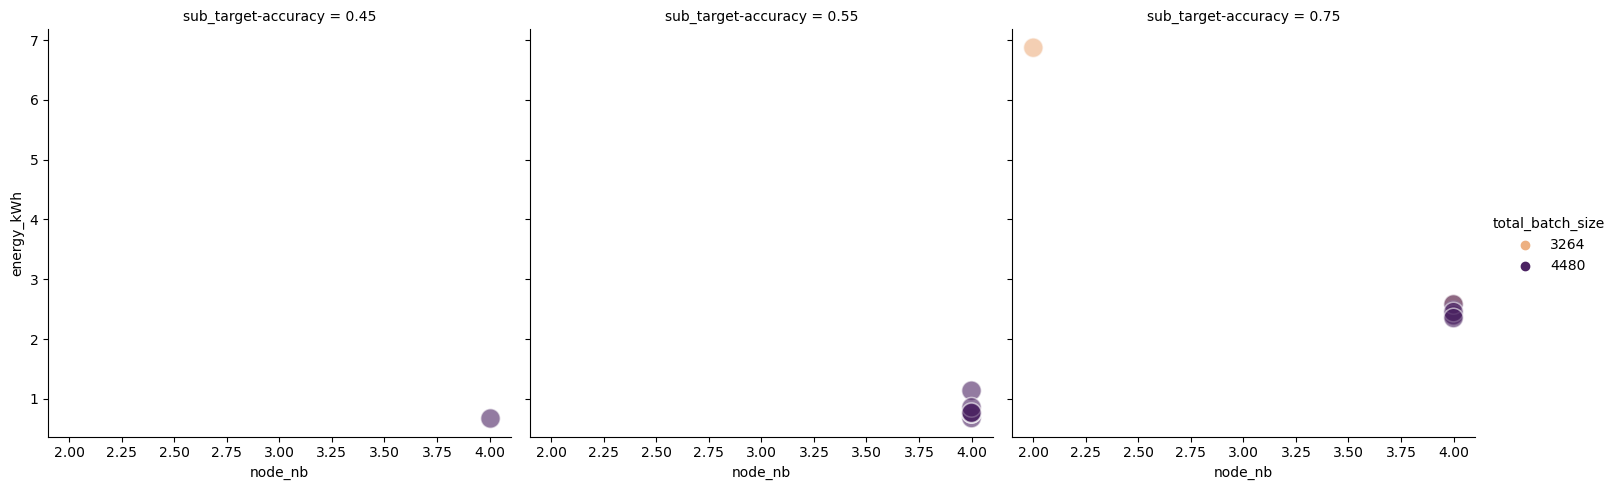

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.relplot(
    data=jobs[jobs["mllog_eval_accuracy"]>0.6],
    x="node_nb", y="energy_kWh", col="sub_target-accuracy", hue="total_batch_size", s=200, alpha=0.6, palette="flare"
)

# MLLOG

In [ ]:
list(jobs.job)

[126990,
 127007,
 127008,
 127009,
 127010,
 127011,
 127012,
 127013,
 127014,
 127015,
 127016,
 127017,
 127018,
 127753,
 127754,
 127755,
 127756,
 127757,
 127758,
 127759,
 127760,
 127761,
 127762,
 127763,
 127764]

In [27]:
plot_df = jobs[(jobs["job"]==127764)]

file = plot_df.file.values[0]
file.split("/")[-2:]

log_file = path + "/".join(file.split("/")[-2:])
print(log_file)


/Users/mathildepro/Documents/code_projects/hpe_logs/resultats_nov/resnet/127764/231117221731427451220_1.log


In [28]:

import sys
sys.path.append("../../../logging/mlperf_logging/")
from compliance_checker.mlp_parser import parse_file
loglines, _ = parse_file(log_file, ruleset="2.1.0")
mllog = pd.DataFrame(loglines)
mllog

,full_string,timestamp,key,value,lineno
0,":::MLLOG {""...",1.700256e+12,submission_...,{'value': '...,0
1,":::MLLOG {""...",1.700256e+12,submission_org,{'value': '...,1
2,":::MLLOG {""...",1.700256e+12,submission_...,{'value': '...,2
3,":::MLLOG {""...",1.700256e+12,submission_...,{'value': '...,3
4,":::MLLOG {""...",1.700256e+12,submission_...,{'value': '...,4
...,...,...,...,...,...
381,":::MLLOG {""...",1.700258e+12,eval_start,{'value': N...,381
382,":::MLLOG {""...",1.700258e+12,eval_stop,{'value': N...,382
383,":::MLLOG {""...",1.700258e+12,eval_accuracy,{'value': 0...,383
384,":::MLLOG {""...",1.700258e+12,block_stop,{'value': N...,384


In [29]:
def get_value(row):
    """Get key value pairs from mllog rows."""
    for key, value in row['metadata'].items():
        row["meta_"+key] = value
    return row

mllog['metadata'] = mllog.apply(lambda row: row['value']['metadata'], axis=1)
mllog['value'] = mllog.apply(lambda row: row['value']['value'], axis=1)
mllog = mllog.apply(get_value, axis=1)


In [30]:
mllog[-20:]

,full_string,key,lineno,meta_epoch_count,meta_epoch_num,meta_file,meta_first_epoch_num,meta_lineno,meta_status,meta_step,meta_tensor,metadata,timestamp,value
366,":::MLLOG {""...",epoch_stop,366,NaN,32.0,/workspace/...,NaN,988,NaN,NaN,NaN,{'file': '/...,1.700257e+12,None
367,":::MLLOG {""...",tracked_stats,367,NaN,NaN,/workspace/...,NaN,1004,NaN,32.0,NaN,{'file': '/...,1.700257e+12,{'imgs_sec'...
368,":::MLLOG {""...",throughput,368,NaN,NaN,/workspace/...,NaN,1007,NaN,NaN,NaN,{'file': '/...,1.700257e+12,27135.228232
369,":::MLLOG {""...",epoch_start,369,NaN,33.0,/workspace/...,NaN,915,NaN,NaN,NaN,{'file': '/...,1.700257e+12,None
370,":::MLLOG {""...",epoch_stop,370,NaN,33.0,/workspace/...,NaN,988,NaN,NaN,NaN,{'file': '/...,1.700258e+12,None
371,":::MLLOG {""...",tracked_stats,371,NaN,NaN,/workspace/...,NaN,1004,NaN,33.0,NaN,{'file': '/...,1.700258e+12,{'imgs_sec'...
372,":::MLLOG {""...",throughput,372,NaN,NaN,/workspace/...,NaN,1007,NaN,NaN,NaN,{'file': '/...,1.700258e+12,27094.462144
373,":::MLLOG {""...",epoch_start,373,NaN,34.0,/workspace/...,NaN,915,NaN,NaN,NaN,{'file': '/...,1.700258e+12,None
374,":::MLLOG {""...",epoch_stop,374,NaN,34.0,/workspace/...,NaN,988,NaN,NaN,NaN,{'file': '/...,1.700258e+12,None
375,":::MLLOG {""...",tracked_stats,375,NaN,NaN,/workspace/...,NaN,1004,NaN,34.0,NaN,{'file': '/...,1.700258e+12,{'imgs_sec'...


In [34]:
mllog[mllog["key"]=="tracked_stats"]["value"].values[0]


{'imgs_sec': 26789.241447032575}

<Axes: xlabel='timestamp'>

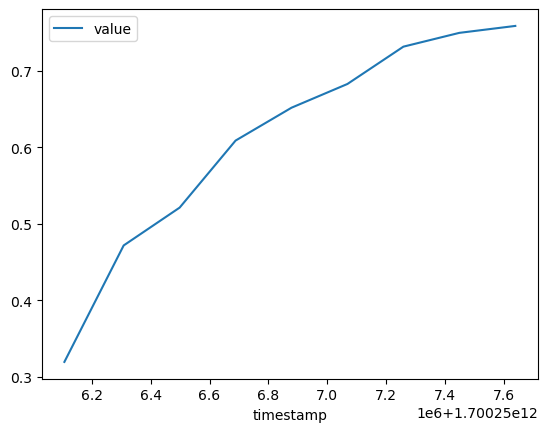

In [31]:
mllog[mllog["key"]=="eval_accuracy"][["timestamp", "value"]].plot(x="timestamp", y="value")